<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2 </b>
    
Thank you for your diligence! I've left a couple of new comments with digit 2, but there's nothing that needs to be fixed.
    
    
You did a fantastic job here. You have correctly splitted the data, explored the distributions, trained several models, and applied the bootstrapping technique. You have successfully estimated profit and conducted risk analysis. You have also compared regions based on risk-adjusted return to make recommendations for further development. Excellent job! 
    
    
I do not have any questions, so the project can be accepted. The next sprints will cover more advanced machine learning methods, I hope you will like it. Good luck! 
    
    

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Elizabeth, I am a reviewer on this project. Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- You have successfully explored the regions;
    
        
    
- Used linear regression to make predictions;
    
    
- Calculated profit and estimated risk values; 
    
    
- Wrote an excellent conclusion that shows how the project met its objectives. Good job! 

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,



- Please try to explore the distributions and add conclusions. In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue; 


    
- When comparing the break-even value with the average reserves, please make sure you use the same units :) 
    
    
- According to the task, we need to implement profit function. Would you try to implement it and call it in th bootstrapping loop? 
    
    
- Consider specifying the `random_state` parameter inside the `sample` method to ensure reproducibility. Otherwise, the results may differ with each run.
    

There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much for submitting the project! Actually the project is almost perfect, and the updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a nice [article](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) about the bootstrap method. [This](https://www.youtube.com/watch?v=O_Fj4q8lgmc&list=LL&index=6) is a good video about resampling in bootstrapping.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

# Regional Models for New Oil Wells
The purpose of this project is to develop models based on goeographical data from 3 different regions to help determine the best place for a new well. The budget for development of 200 oil wells is 100 USD million and the revenue from one unit of product (volume of reserves in thousand barrels) is 4,500 USD.

The data that we will be using in this analysis is geological exploration data for the three regionsas follows:
- geo_data_0
- geo_data_1
- geo_data_2

Each data set has 5 columns including:
- id — unique oil well identifier
- f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- product — volume of reserves in the oil well (thousand barrels).

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! The title reflects the main goal of the project, well done!     
</div>

## Importing and Preparing the Data

First we will import our data, review it and prepare it so that it is useable for our analysis and to build our model.

In [1]:
#Import Libraries that will be Needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
#Download Dataset

geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
#Briefly Review the Data

geo_data_0.info()
print()
print(geo_data_0.sample(5))
print()
geo_data_1.info()
print()
print(geo_data_1.sample(5))
print()
geo_data_2.info()
print()
print(geo_data_2.sample(5))

#check for duplicates
print(geo_data_0.duplicated().sum())
print()
print(geo_data_1.duplicated().sum())
print()
print(geo_data_2.duplicated().sum())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

          id        f0        f1        f2     product
63991  I2KKw  0.059653  0.474235  2.298949   73.118161
11378  OkBpE  1.273862 -0.486130  0.610755   44.250711
54293  jHUZm -1.012260  0.332169  3.842668   16.370693
76661  5DWDh -0.297826  1.059153  1.510959  112.435500
96434  byPno -0.412783  0.696757  4.196602   93.477819

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
The data was successfully read, good! 
    
    
    
Agreed, it is indeed important to check data for the duplicates, since we are going to split the data. You can also check for the duplicates in the `id` columns. However, we do not need to delete them if they exist, since these columns will not be considered, and we can interpret these points as different objects.     

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
With dataframes, `display` produces better outputs. Display is a great thing. However, jupyter notebook is an interactive environment that already includes display. When we call a dataframe (see the code below), jupyter prints this dataframe like we do with the display method:

    
</div>

In [4]:
# Reviewer's code

display(geo_data_0.head(3))

geo_data_0.tail(3)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


,id,f0,f1,f2,product
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246


Based on this it seems that there are no missing values or duplicate rows.  All our features and our target (product) are float types so we don't have use OHE to add any columns or rows. Next we will get ideas of the distribution of our features and product for each region. And we can start creating our models for each region. 

count    100000.000000
mean          0.500419
std           0.871832
min          -1.408605
25%          -0.072580
50%           0.502360
75%           1.073581
max           2.362331
Name: f0, dtype: float64


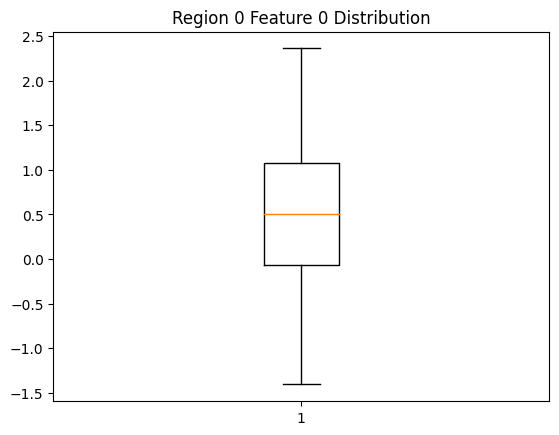


count    100000.000000
mean          1.141296
std           8.965932
min         -31.609576
25%          -6.298551
50%           1.153055
75%           8.621015
max          29.421755
Name: f0, dtype: float64


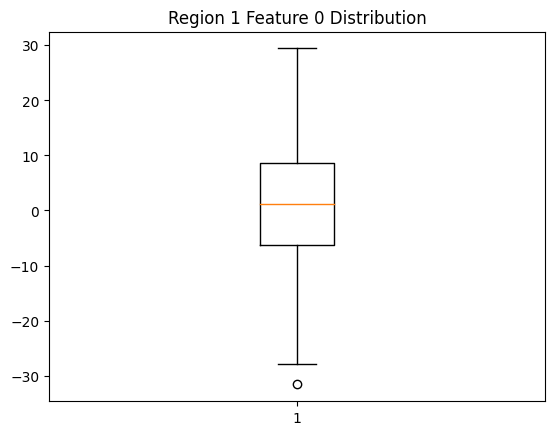


count    100000.000000
mean          0.002023
std           1.732045
min          -8.760004
25%          -1.162288
50%           0.009424
75%           1.158535
max           7.238262
Name: f0, dtype: float64


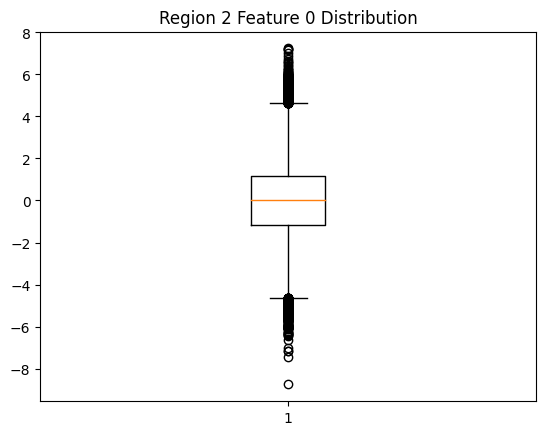

In [5]:
#f0 distribtuion

print(geo_data_0['f0'].describe())
plt.figure()
plt.boxplot(geo_data_0['f0'])
plt.title('Region 0 Feature 0 Distribution')
plt.show()
print()
print(geo_data_1['f0'].describe())
plt.figure()
plt.boxplot(geo_data_1['f0'])
plt.title('Region 1 Feature 0 Distribution')
plt.show()
print()
print(geo_data_2['f0'].describe())
plt.figure()
plt.boxplot(geo_data_2['f0'])
plt.title('Region 2 Feature 0 Distribution')
plt.show()

For feature 0, it seems that region 0 has the most normal distribution, with narrow limits, region 1 has a very wide range and region 2 has a lot of outliers that can skew the data. 

count    100000.000000
mean          0.250143
std           0.504433
min          -0.848218
25%          -0.200881
50%           0.250252
75%           0.700646
max           1.343769
Name: f1, dtype: float64


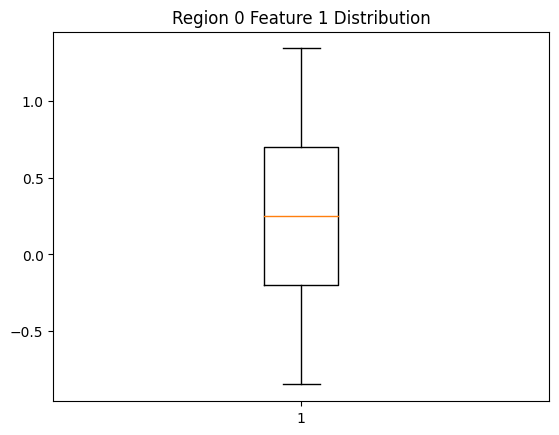


count    100000.000000
mean         -4.796579
std           5.119872
min         -26.358598
25%          -8.267985
50%          -4.813172
75%          -1.332816
max          18.734063
Name: f1, dtype: float64


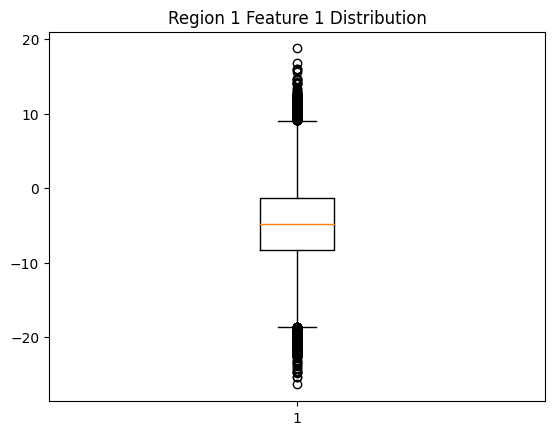


count    100000.000000
mean         -0.002081
std           1.730417
min          -7.084020
25%          -1.174820
50%          -0.009482
75%           1.163678
max           7.844801
Name: f1, dtype: float64


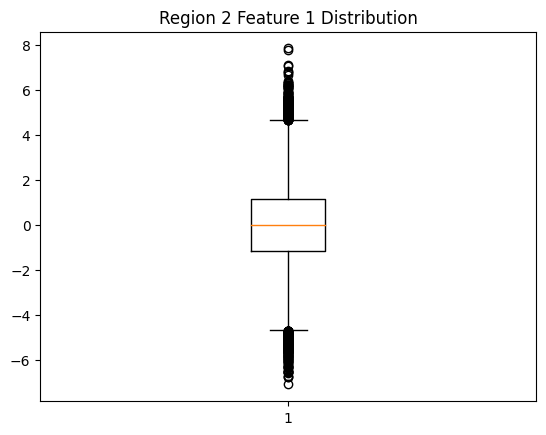

In [6]:
#f1 distribtuion

print(geo_data_0['f1'].describe())
plt.figure()
plt.boxplot(geo_data_0['f1'])
plt.title('Region 0 Feature 1 Distribution')
plt.show()
print()
print(geo_data_1['f1'].describe())
plt.figure()
plt.boxplot(geo_data_1['f1'])
plt.title('Region 1 Feature 1 Distribution')
plt.show()
print()
print(geo_data_2['f1'].describe())
plt.figure()
plt.boxplot(geo_data_2['f1'])
plt.title('Region 2 Feature 1 Distribution')
plt.show()

For feature 2, region 0 again seems the most normally distributed without many outliers, while region 1 has a very wide distribution and many outliers, and region 2 has many outliers as well that likely skews the data.

count    100000.000000
mean          2.502647
std           3.248248
min         -12.088328
25%           0.287748
50%           2.515969
75%           4.715088
max          16.003790
Name: f2, dtype: float64


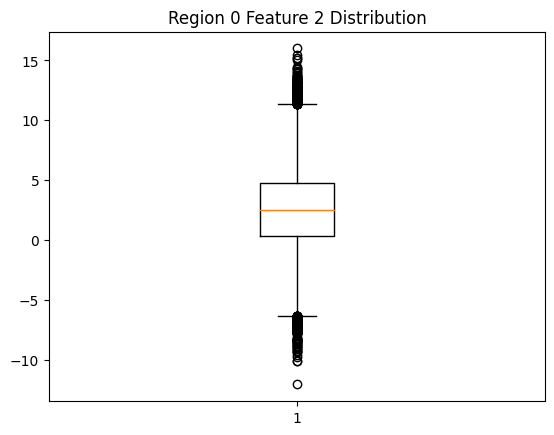


count    100000.000000
mean          2.494541
std           1.703572
min          -0.018144
25%           1.000021
50%           2.011479
75%           3.999904
max           5.019721
Name: f2, dtype: float64


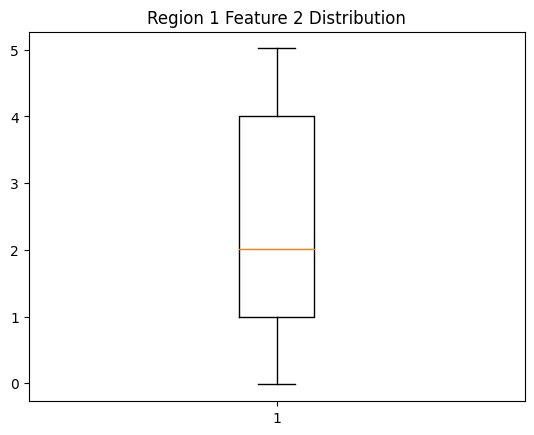


count    100000.000000
mean          2.495128
std           3.473445
min         -11.970335
25%           0.130359
50%           2.484236
75%           4.858794
max          16.739402
Name: f2, dtype: float64


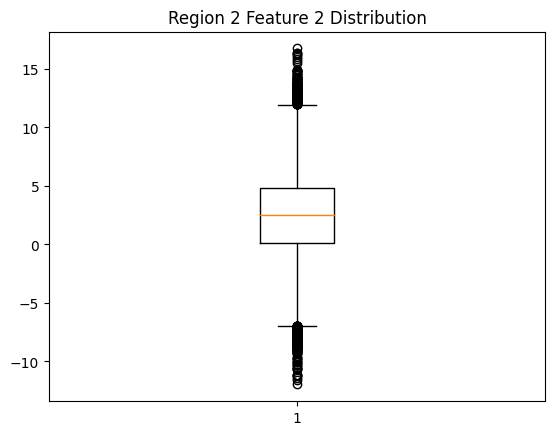

In [7]:
#f2 distribtuion

print(geo_data_0['f2'].describe())
plt.figure()
plt.boxplot(geo_data_0['f2'])
plt.title('Region 0 Feature 2 Distribution')
plt.show()
print()
print(geo_data_1['f2'].describe())
plt.figure()
plt.boxplot(geo_data_1['f2'])
plt.title('Region 1 Feature 2 Distribution')
plt.show()
print()
print(geo_data_2['f2'].describe())
plt.figure()
plt.boxplot(geo_data_2['f2'])
plt.title('Region 2 Feature 2 Distribution')
plt.show()

For feature 2, region 0 and region 2 have many outliers that likely skew the data, while region 1 is skewed to the left, but doesn't have as many outliers that can affect the mean. 

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64


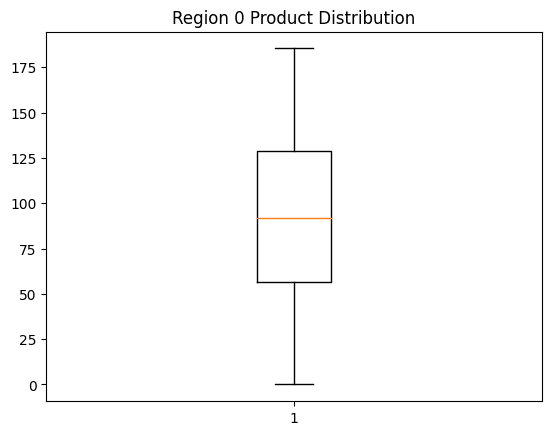


count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64


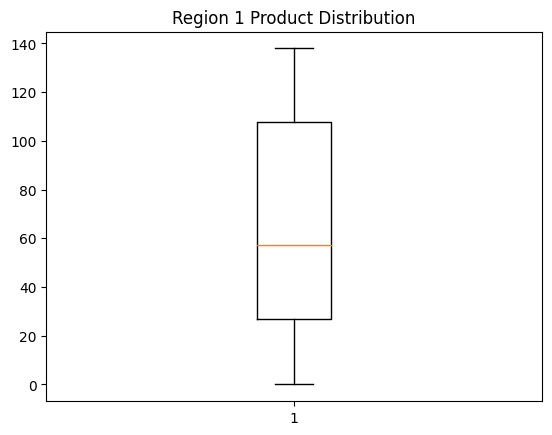


count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64


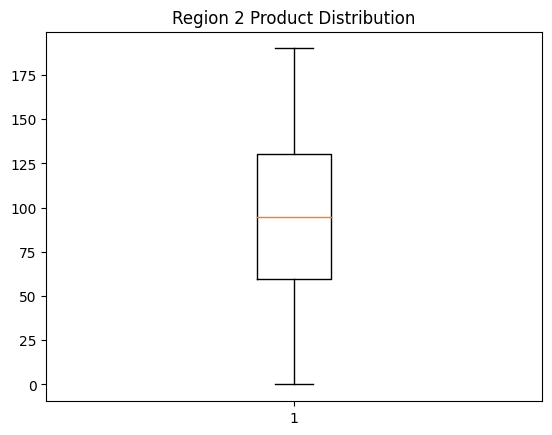

In [8]:
#product distribtuion (target values)

print(geo_data_0['product'].describe())
plt.figure()
plt.boxplot(geo_data_0['product'])
plt.title('Region 0 Product Distribution')
plt.show()
print()
print(geo_data_1['product'].describe())
plt.figure()
plt.boxplot(geo_data_1['product'])
plt.title('Region 1 Product Distribution')
plt.show()
print()
print(geo_data_2['product'].describe())
plt.figure()
plt.boxplot(geo_data_2['product'])
plt.title('Region 2 Product Distribution')
plt.show()

Looking at our target's distribution can give us an idea of what to expect from our models. Region 0 appears to be fairly normally distributed making it equally as likely to choose wells with greater volume of reserves than the mean as less. Region 1 is skewed slightly to the left and has a lower mean indicating that there tend to be more concentration of wells with lower volume reserves. Region 2 also appears to be fairly normally distributed, but with a greater distribution between the 1st quartile and the minimum value and the thrid quartile and the max value.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Great job in this section! 

</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    


- Let's analyze features and targets distributions in each dataframe. Would you add charts? Try to use histograms and boxplots.  Please don't forget to add titles and axes labels.


- We will also need to add conclusions. 
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
    
Since we are using a linear model, it may be useful to conduct correlation analysis.

</div>

## Train and Test the Models for Each Region

We will go through the process or training and testing our model for region 0 first (geo_data_0), then 1 (geo_data_1) and finally 2 (geo_data_2). 

In [9]:
#2.1 Split the data into a training set and validation set at a ratio of 75:25
geo_data_0_train, geo_data_0_valid = train_test_split(geo_data_0, test_size=0.25, random_state=12345)

#create Training set features and target

features_0_train= geo_data_0_train.drop(['product','id'], axis = 1)#remove product as it is the target and remove id as that will not provide more information for our model
target_0_train = geo_data_0_train['product']

features_0_valid= geo_data_0_valid.drop(['product','id' ], axis = 1)#remove product as it is the target and remove id as that will not provide more information for our model
target_0_valid = geo_data_0_valid['product']

#identify numeric features
numeric= ['f0', 'f1', 'f2']

In [10]:
#Standardized Numeric Features
scaler = StandardScaler()
scaler.fit(features_0_train[numeric])

features_0_train[numeric] = scaler.transform(features_0_train[numeric])
features_0_valid[numeric] = scaler.transform(features_0_valid[numeric])

print(features_0_train.shape)

(75000, 3)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

It's great that you scale the data, since it may be crucial for linear models. However, in this case it will not change the RMSE. It's also good that you do that after you split the data, which is very important because we don't want the data to leak.

    
</div>

In [11]:
#print value counts for our target to get an idea of the distribution of our classes for our target (product)

print(geo_data_0['product'].value_counts())

0.000000      1
30.141653     1
56.573577     1
50.182301     1
88.989990     1
             ..
146.560758    1
155.729658    1
27.829511     1
85.382946     1
154.424007    1
Name: product, Length: 100000, dtype: int64


Here we can see that every signle class is represented equally as there is no product value that is exactly the same.  This makes sense as it would be very unlikely for any unique oild well to have the exact same volume of reserves as another. We can train our model without having to balance our classes. 

In [12]:
#train our model
geo_0_model = LinearRegression()
geo_0_model.fit(features_0_train, target_0_train)
predicted_0_valid = geo_0_model.predict(features_0_valid)

result_0 = mean_squared_error(target_0_valid, predicted_0_valid)**0.5
print('RMSE of the linear regression model for region 0 on the validation set is:', result_0)

RMSE of the linear regression model for region 0 on the validation set is: 37.5794217150813


As you can see our model for region 0 has a fairly high RMSE, so we can likely conclude that it will not be a reliable model in this region to predict wells with more volume of reserves. Now we will create our model for region 1.

In [13]:
#2.1 Split the data into a training set and validation set at a ratio of 75:25
geo_data_1_train, geo_data_1_valid = train_test_split(geo_data_1, test_size=0.25, random_state=12345)

#create Training set features and target

features_1_train= geo_data_1_train.drop(['product','id'], axis = 1) #remove product as it is the target and remove id as that will not provide more information for our model
target_1_train = geo_data_1_train['product']

features_1_valid= geo_data_1_valid.drop(['product','id' ], axis = 1)#remove product as it is the target and remove id as that will not provide more information for our model
target_1_valid = geo_data_1_valid['product']

#identify numeric features
numeric= ['f0', 'f1', 'f2']

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
You can use a loop or a function, since the code is the same for all three regions. Not only will it make the code  shorter and easier to read, it will help you avoid typos.
 

</div>

In [14]:
#Standardized Numeric Features
scaler = StandardScaler()
scaler.fit(features_1_train[numeric])

features_1_train[numeric] = scaler.transform(features_1_train[numeric])
features_1_valid[numeric] = scaler.transform(features_1_valid[numeric])

print(features_1_train.shape)

(75000, 3)


In [15]:
#train our model - skipping class balance review as doing it in the first region helped me realize it is not necessary in regression tasks
geo_1_model = LinearRegression()
geo_1_model.fit(features_1_train, target_1_train)
predicted_1_valid = geo_1_model.predict(features_1_valid)

result_1 = mean_squared_error(target_1_valid, predicted_1_valid)**0.5
print('RMSE of the linear regression model for region 1 on the validation set is:', result_1)

RMSE of the linear regression model for region 1 on the validation set is: 0.893099286775617


As we can see our model for region 1 has an RMSE VERY close to 0 compared to region 0, meaning this model is much better at predicting volume of oil wells.  Now we will move on to creating our model for region 2.

In [16]:
#2.1 Split the data into a training set and validation set at a ratio of 75:25
geo_data_2_train, geo_data_2_valid = train_test_split(geo_data_2, test_size=0.25, random_state=12345)

#create Training set features and target

features_2_train= geo_data_2_train.drop(['product','id'], axis = 1) #remove product as it is the target and remove id as that will not provide more information for our model
target_2_train = geo_data_2_train['product']

features_2_valid= geo_data_2_valid.drop(['product','id' ], axis = 1)#remove product as it is the target and remove id as that will not provide more information for our model
target_2_valid = geo_data_2_valid['product']

#identify numeric features
numeric= ['f0', 'f1', 'f2']

In [17]:
#Standardized Numeric Features
scaler = StandardScaler()
scaler.fit(features_2_train[numeric])

features_2_train[numeric] = scaler.transform(features_2_train[numeric])
features_2_valid[numeric] = scaler.transform(features_2_valid[numeric])

print(features_2_train.shape)

(75000, 3)


In [18]:
#train our model - skipping class balance review as doing it in the first region helped me realize it is not necessary in regression tasks
geo_2_model = LinearRegression()
geo_2_model.fit(features_2_train, target_2_train)
predicted_2_valid = geo_2_model.predict(features_2_valid)

result_2 = mean_squared_error(target_2_valid, predicted_2_valid)**0.5
print('RMSE of the linear regression model for region 2 on the validation set is:', result_2)

RMSE of the linear regression model for region 2 on the validation set is: 40.02970873393434


Our model for region 2 has the largest of all 3 regions, so will be the least reliable in predict oil volume reserves in wells.  Based on this the model for region 1 will best predict this, then region 0's model and finally region 2's. Therefore, we will 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct! Region 2 is the most profitable, but it has the highest model error at the same time. 

</div>

## Prepare for Profit Calculation

In [19]:
#3.1 Store all key values for calculations in separate variables.

#revenue
revenue_per_unit_of_product = 4500

#Cost is our budget of $100 million USD. We are not given anything about operating expenses etc. so we can assume this budget is all encompassing
cost = 100000000

In [20]:
# 3.2. Calculate the volume of reserves sufficient for developing a new well without losses.

total_break_even_point = (cost/revenue_per_unit_of_product)
break_even_point_per_unit = (total_break_even_point)/ 200
print('The total volume of reserves we will need to that is sufficient for developing a new well without losses is:', total_break_even_point)
print('The break even point per well if we select 200 wells would be:', break_even_point_per_unit)

The total volume of reserves we will need to that is sufficient for developing a new well without losses is: 22222.222222222223
The break even point per well if we select 200 wells would be: 111.11111111111111


This shows that for us to break even, the 200 wells that we select must have a total product (volume of reserves in thousand barrels) of just over 22,222 or just over 111 per well. 

In [21]:
#3.2 Compare the break-even value with the average volume of reserves in each region.

av_product_0 = geo_data_0['product'].mean()
print('The average volume of reserves in region 0 is:', av_product_0)
print()
av_product_1 = geo_data_1['product'].mean()
print('The average volume of reserves in region 1 is:', av_product_1)
print()
av_product_2 = geo_data_2['product'].mean()
print('The average volume of reserves in region 2 is:', av_product_2)

The average volume of reserves in region 0 is: 92.50000000000001

The average volume of reserves in region 1 is: 68.82500000000002

The average volume of reserves in region 2 is: 95.00000000000004


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    

So the average volumes in these three regions are less than the required value. If we are to select the wells randomly, we are probably going to lose money. That's why we need machine learning and bootstrapping to estimate profit distributions. 
    
    
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
If you are using  `product`, which is in thousands, to compare it with the break-even value, you need to calculate the break-even value in thousands as well. If revenue per unit is \$4,500, our budget is 1e8 and we have 200 points, then the required volume for break-even is budget / 4500 / 200. 
    
</div>

The break even value per well is substantially higher than the average product in any one given well, but we can see that the average product in regions 2 and 0 is higher than in region 1. Therefore, if we only used our average volume of reserves for each region we would not breakeven. This shows us that we must pick the wells we drill very carefully to maximize the volume of reserves that we can obtain. 

## Calculate profit from a set of selected oil wells and model predictions

In [22]:
#4.1 Pick the wells with the highest values of predictions
def select_top_wells(predictions, n):
    """Select the top n wells based on predictions."""
    predictions_series = pd.Series(predictions)
    return predictions_series.nlargest(n)

top_wells_0 = select_top_wells(predicted_0_valid, 200)
top_wells_1 = select_top_wells(predicted_1_valid, 200)
top_wells_2 = select_top_wells(predicted_2_valid, 200)

print(top_wells_0)
print('Total volume of top reserves in region 0 is:', top_wells_0.sum())
print()
print(top_wells_1)
print('Total volume of top reserves in region 1 is:', top_wells_1.sum())
print()
print(top_wells_2)
print('Total volume of top reserves in region 2 is:', top_wells_2.sum())
print()

9317     180.180713
219      176.252213
10015    175.850623
11584    175.658429
23388    173.299686
            ...    
7888     148.507064
7890     148.481767
24051    148.476498
24160    148.436761
20340    148.365941
Length: 200, dtype: float64
Total volume of top reserves in region 0 is: 31102.330838811402

20430    139.818970
7777     139.773423
8755     139.703330
1178     139.560938
4285     139.516754
            ...    
12774    138.421423
8040     138.416960
2257     138.413881
17108    138.412834
9693     138.410697
Length: 200, dtype: float64
Total volume of top reserves in region 1 is: 27746.02678216343

22636    165.856833
24690    165.679685
7811     163.439962
1581     162.062589
6751     161.797476
            ...    
5541     142.490763
18126    142.485922
11122    142.465777
22669    142.454763
23447    142.408851
Length: 200, dtype: float64
Total volume of top reserves in region 2 is: 29603.89865831835



When looking at the top 200 oil reserves in each region we are able to exceed our "breakeven" point of 222,222.22 in each region.  Based on our models alone region 0 has the highest potential of exceeding as it's total volume of reserves is the greatest, while region 1 is the lowest. That being said, there is likely to be more risk of inaccurate predictions in regions 0 and 3 as their RMSE values were both very large, while region 1 had an RMSE very close to 0, meaning that our predictions are likely much more accurate and likely decreases our risk of "over-predicting" how much volume these reserves have.  Therefore, I would recommend region 1, as you can be more confident in getting close to these predicted values and you will still have a positive gross profit as we will calculate below.

In [23]:
#4.3 calculate the profit for selected region (region 1)

region_1_revenue = (top_wells_1.sum()* revenue_per_unit_of_product)
region_1_profit = region_1_revenue - cost
print(region_1_profit)

24857120.51973544


In [24]:
def profit(sample):
    revenue = sample.sum() * 4500  # Revenue per 1000 barrels
    costs = 100 * 1e6  # Costs in dollars
    return revenue - costs
    
print(profit(top_wells_1))   

24857120.51973544


Based on these calculations, if you utilize the top 200 wells based on our model in region 1, the estimated profit would equal $24,857,120.52.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    

Good!    
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    

I still recommend that you sort predictions and take targets inside this function, not in the loop below before you call the function.    
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
According to the task, we need to define the profit function that we will call in the bootstrapping loop later. Would yoou please try to implement it? 
    
    
You have corretly implemented its logic in the loop below: we indeed select the best 200 wells by predictions, but then we need to use target values to actually calculate profit because predictions may not be accurate. Would you please wrap the calculation into a function and call it there?      
</div>

## Calculate Risks and Profit for Each Region

In [25]:
#5.1 Use the bootstrapping technique with 1000 samples to find the distribution of profit for region 1
def bootstrap_profit(predictions, target, n_samples=1000, n_wells=500, random_state=None):
    rng = np.random.RandomState(seed=random_state)  # Set random state
    profits = []

    for i in range(n_samples):
        # Sample indices with replacement
        sample_indices = rng.choice(len(predictions), n_wells, replace=True) #np.random.choice(len(predictions), n_wells, replace=True)
        sample_predictions = pd.Series(predictions[sample_indices]).sort_values(ascending = False).head(200)
        sample_top_200 = target[sample_predictions.index]
    

        # Calculate profit
        #revenue = sample_top_200.sum() * 4500  # Revenue per 1000 barrels
        #costs = 100 * 1e6  # Costs in dollars
        #profit = revenue - costs

        profits.append(profit(sample_top_200.sum()))
    
    # Convert to numpy array for easier calculations
    profits = np.array(profits)

    # Calculate required statistics
    mean_profit = np.mean(profits)
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    negative_profit_probability = np.mean(profits < 0)

    return mean_profit, confidence_interval, negative_profit_probability

# Region 1
top_predictions_1 = pd.Series(predicted_1_valid)
top_target_1 = target_1_valid.reset_index(drop = True)

# Call the bootstrapping function using the predictions only
mean_profit_1, confidence_interval_1, negative_profit_probability_1 = bootstrap_profit(top_predictions_1, top_target_1, random_state= 12345)


print(f"Region 1 - Mean Profit: {mean_profit_1}")
print(f"Region 1 - 95% Confidence Interval: {confidence_interval_1}")
print(f"Region 1 - Risk of Loss: {negative_profit_probability_1 * 100}%")

Region 1 - Mean Profit: 4560451.057866608
Region 1 - 95% Confidence Interval: [ 338205.09398985 8522894.53866035]
Region 1 - Risk of Loss: 1.5%


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    

Good!     
</div><div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

There's a replacement, well done! We indeed need to sample 500 rows with replacement. The point is that if we remove the replacement, our subsample (or rather, all subsamples) will simply resemble the original sample.
    
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

I recommend explicitly specifying the `random_state` parameter inside the `sample` method to ensure reproducibility. Otherwise, the results may differ with each run.

</div>

In [26]:
# Region 0
top_predictions_0 = pd.Series(predicted_0_valid)
top_target_0 = target_0_valid.reset_index(drop = True)

# Call the bootstrapping function
mean_profit_0, confidence_interval_0, negative_profit_probability_0 = bootstrap_profit(top_predictions_0, top_target_0, random_state= 12345)


print(f"Region 0 - Mean Profit: {mean_profit_0}")
print(f"Region 0 - 95% Confidence Interval: {confidence_interval_0}")
print(f"Region 0 - Risk of Loss: {negative_profit_probability_0 * 100}%")

Region 0 - Mean Profit: 3961649.8480237117
Region 0 - 95% Confidence Interval: [-1112155.45890496  9097669.41553423]
Region 0 - Risk of Loss: 6.9%


In [27]:
# Region 2
top_predictions_2 = pd.Series(predicted_2_valid)
top_target_2 = target_2_valid.reset_index(drop = True)

# Call the bootstrapping
mean_profit_2, confidence_interval_2, negative_profit_probability_2 = bootstrap_profit(top_predictions_2, top_target_2, random_state= 12345)


print(f"Region 2 - Mean Profit: {mean_profit_2}")
print(f"Region 2 - 95% Confidence Interval: {confidence_interval_2}")
print(f"Region 2 - Risk of Loss: {negative_profit_probability_2 * 100}%")

Region 2 - Mean Profit: 4044038.665683568
Region 2 - 95% Confidence Interval: [-1633504.133956  9503595.749238]
Region 2 - Risk of Loss: 7.6%


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Good! </div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

You can also create a function that will calculate the statistics for any region. 

</div>

In conclusion, the repeated sampling and testing provided from bootstrapping reinforced the conlcusion we had made in part 4 that region 1 is likely the safest bet for positive net profit in developing new wells.  As that model had a much smaler and more accurate RMSE, it is better at predicting reserve volume, so our confidence interval is more narrow and our risk of loss is much lower at 1.5%.  Whereas our other 2 regions had very large RMSE, therefore being worse at accurately predicting reserve volume, so our confidence intervals are much wider and our risk of loss is much higher at around 7% or more for each. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Excellent job, thank you so much! 
    
</div><div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Good conclusion! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

Please don't forget to update it, since the results change after each run because `random_state` parameter was not defined :)     
</div>